# Signate
# FDUA
# 第2回 金融データ活用チャレンジ

In [1]:
import os
import random
import numpy as np
import pandas as pd
from sklearn import model_selection
from sklearn.model_selection import StratifiedKFold

import seaborn as sns

In [2]:
def seed_everything(seed: int):
    random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    np.random.seed(seed)

In [3]:
# Congig
SEED = 42
FOLD = 7
pd.get_option('display.max_columns')
seed_everything(SEED)

In [4]:
df = pd.read_csv('./train.csv', index_col=0) # 学習用データ

In [5]:
df.head()

,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,RevLineCr,LowDoc,DisbursementDate,MIS_Status,Sector,ApprovalDate,ApprovalFY,City,State,BankState,DisbursementGross,GrAppv,SBA_Appv,UrbanRural
0,163,21,1.0,0,0,1,N,N,31-Jan-98,1,0,22-Sep-06,2006,PHOENIX,AZ,SD,"$80,000.00","$80,000.00","$68,000.00",0
1,84,6,1.0,4,0,0,0,N,31-Oct-93,1,62,30-Jun-92,1992,MCALESTER,OK,OK,"$287,000.00","$287,000.00","$229,600.00",0
2,242,45,1.0,4,90,0,N,N,31-Aug-01,1,42,18-Apr-01,2001,HAWTHORNE,NJ,NJ,"$31,983.00","$30,000.00","$15,000.00",1
3,237,4,1.0,0,0,0,N,N,31-Aug-07,1,33,6-Oct-03,2004,NASHVILLE,TN,SD,"$229,000.00","$229,000.00","$229,000.00",0
4,184,0,1.0,0,0,0,N,N,8-Jun-83,1,0,17-Dec-99,2000,POMONA,CA,CA,"$525,000.00","$525,000.00","$393,750.00",0


In [6]:
df.isnull().sum()

Term                    0
NoEmp                   0
NewExist                0
CreateJob               0
RetainedJob             0
FranchiseCode           0
RevLineCr            1079
LowDoc                531
DisbursementDate      150
MIS_Status              0
Sector                  0
ApprovalDate            0
ApprovalFY              0
City                    0
State                   0
BankState              11
DisbursementGross       0
GrAppv                  0
SBA_Appv                0
UrbanRural              0
dtype: int64

In [7]:
#重複あり？
df.duplicated().sum()

0

In [8]:
# Target
df["MIS_Status"].value_counts()

MIS_Status
1    37767
0     4540
Name: count, dtype: int64

<Axes: xlabel='MIS_Status', ylabel='count'>

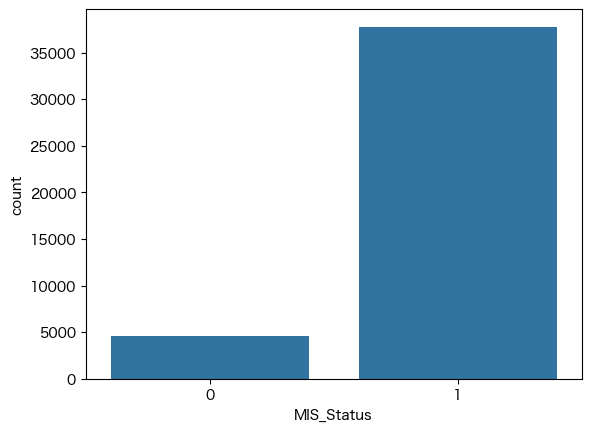

In [9]:
sns.countplot(data=df, x="MIS_Status")

# Folds

In [10]:
df["target"] = df['MIS_Status'].astype(str) + "_" + df['NewExist'].astype(str) 

In [11]:
df["target"].value_counts()

target
1_1.0    30383
1_2.0     7384
0_1.0     3022
0_2.0     1518
Name: count, dtype: int64

<Axes: xlabel='target', ylabel='count'>

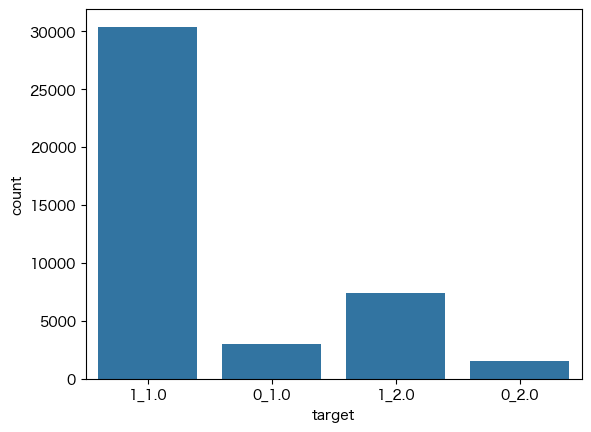

In [12]:
sns.countplot(data=df, x="target")

In [13]:
df["kfold"] = -1

In [14]:
kf = model_selection.StratifiedKFold(n_splits=FOLD, shuffle=True, random_state=SEED)
for fold, (train_indicies, valid_indicies) in enumerate(kf.split(df,df['target'])):
    df.loc[valid_indicies, "kfold"] = fold

In [15]:
df["kfold"].value_counts()

kfold
5    6044
3    6044
1    6044
2    6044
0    6044
4    6044
6    6043
Name: count, dtype: int64

In [16]:
df = df.drop('target',axis=1)

In [17]:
df.to_csv("train_kfold.csv", index=True)